## AllLife Credit Card Customer Segmentation

## Background

AllLife Bank wants to focus on its credit card customer base in the next financial  year.  They  have  been  advised  by  their  marketing  research  team,  that  the penetration  in  the  market  can  be  improved. Based  on  this  input,  the  Marketing  team proposes to run personalised campaigns to target new customers as well as upsell to existing  customers.  Another  insight from  the market  research  was  that  the  customers perceive the support services of the bank poorly. Based on this, the Operations team wants  to  upgrade  the  service  delivery  model,  to  ensure  that  customers  queries  are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


## Objective

To identify  different  segments  in  the  existing  customer  based  on  their spending patterns as well as past interaction with the bank.

## Import Libraries

In [504]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

##Scale the data
from scipy.stats import zscore

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist

from sklearn.cluster import AgglomerativeClustering 

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

from scipy.spatial.distance import pdist 

from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import fcluster

from mpl_toolkits.mplot3d import Axes3D

## Read data

In [300]:
# reading the CSV file into pandas dataframe
df = pd.read_excel(r'C:\Users\zehra.hussain\DataScience\Course\UnSupervised\CreditCardCustomerData.xlsx') # Read the data.

In [301]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3



### Data Description:

Data is of various customers of a bank with their credit limit, the total number of credit cards  the  customer  has,  and  different  channels  through  which  customer  has contacted  the  bank  for  any  queries,  different  channels  include  visiting  the  bank, online and through a call centre. 

In [302]:
## Droping S1_No column as it seems like an index
df.drop('Sl_No', axis=1, inplace=True)

In [303]:
## Dataframe has six columns and 660 rows
df.shape

(660, 6)

In [304]:
## All the columns are integers 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


### Univariate Analyis


In [305]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


In [306]:
# there are no null values
df.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

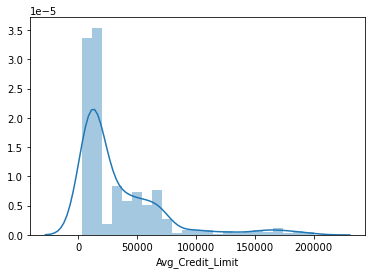

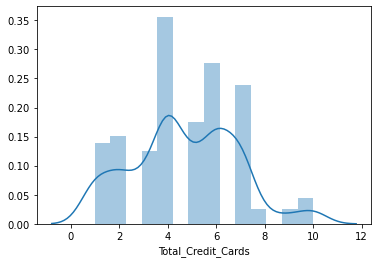

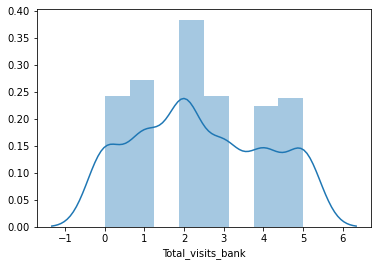

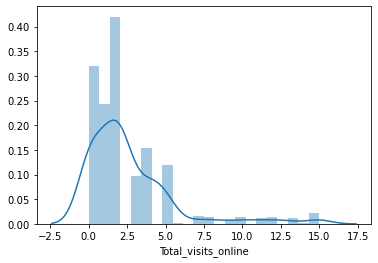

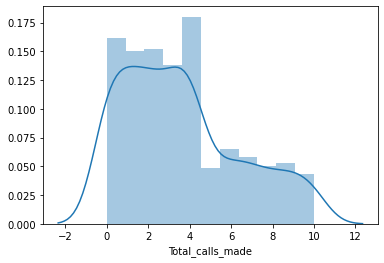

In [307]:
for i in list(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']):  
    sns.distplot(df[i])
    plt.show()

### Key Insights - Distribution plots

1. Majority of the customers have credit limits of less then 20,000. Max limit is 200,000. The population is left skewed
2. Customers have between 1 and 10 credit cards. There is a spike at 4.
3. Total bank visits are between 0 and 5. With mid point at 2 
4. Online visits are anywhere between 0 and 15. Majority of the distribution is between 0 and 2
5. Majority of the total calls made are between 0 and 4 and then between 6 and 10 



In [308]:
## dropping customer keys

df_nokey = df.drop('Customer Key', axis=1)

In [309]:
df_nokey.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


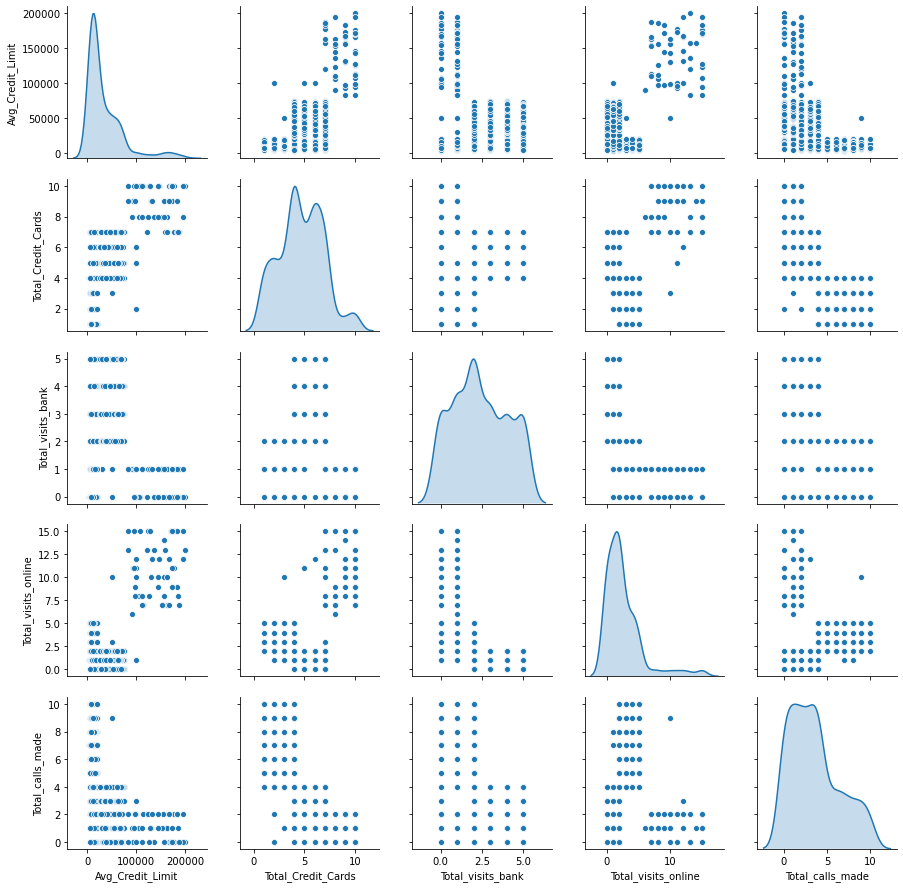

In [310]:
sns.pairplot(df_nokey,diag_kind='kde')

### Observations - PairPlot

1. Total number of credit cards and credit limit seems to have a positive coorelation. It seems like we can see three groups there.

    a. Customers with less then 4 credit cards having a credit limit of less then 50 K 
    
    b. Customers having anywhere between 4 and 6 credit cards with credit limtit between 50K and 100K
    
    c. Customers having more then 6 credit cards with limit greater than 100K  
    
    
2. Customers with less then 50K in credit limit have more visits to the bank then cusotmers with  higher credit limits

3. Although online visits are higher for customers with higer limit and more then 8 credit cards

4. Customers with lower creidt limit and less then 4 cards make a lot more calls

5. Customers having between 4 and 7 cards have a lot more visits to the bank their may be three groups there

6. Online visits seem to have a negative correlations with the calls made. Their seems to be three segments there. 



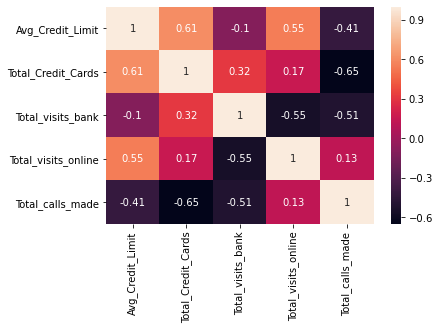

In [311]:
corr = df_nokey.corr()
sns.heatmap(corr, annot = True)

### Key Insights - Correlation

1. Total number of credit cards and average credit limit seems to have a positive correlation

2. Total number of credit cards are negatively correlated to calls made. Customers with more credit cards make less calls

3. Average Credit limit and total online visits seem to have a positive correlation as well. Meaning people with higher credit limit make more online visits

4. Average Credit limit is negatively correlated with calls made. Cutomers with higher creidt limit make less calls

5. Total bank visits is negatively correlatied to online visits. Customers who go online do not visit the bank branch.


## Scale the data 

In [312]:
df_z = df_nokey.apply(zscore)

## K-means Clustering 

### Finding optimal no. of clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

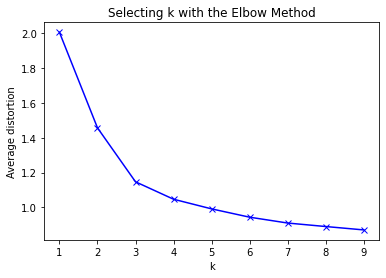

In [313]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_z)
    prediction=model.predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Conclusion - Elbow Method

Usign elboe method we can clearl see that their is a kink in the line at 3. So we will draw there clusters

In [314]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=20)

In [315]:
kmeans.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=20, tol=0.0001, verbose=0)

In [316]:
centroids = kmeans.cluster_centers_

In [317]:
centroids

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882]])

In [336]:
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )

In [337]:
## creating a new dataframe only for labels and converting it into categorical variable
df_Kmeans_labels = pd.DataFrame(kmeans.labels_ , columns = list(['Kmeans_labels']))
df_Kmeans_labels['Kmeans_labels'] = df_Kmeans_labels['Kmeans_labels'].astype('category')

In [338]:
# Joining the label dataframe with the data frame.
df_labeled_KMeans = df_nokey.join(df_Kmeans_labels)

In [339]:
# Joining the label dataframe with the standardized data frame.
df_labeled_KMeans_z = df_z.join(df_Kmeans_labels)

In [340]:
df_labeled_KMeans

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


In [343]:
df_KMeans = (df_labeled_KMeans.groupby(['Kmeans_labels'] , axis=0)).head()  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_KMeans

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


In [345]:
df_labeled_KMeans['Kmeans_labels'].value_counts()  

0    386
2    224
1     50
Name: Kmeans_labels, dtype: int64

In [357]:
df_labeled_KMeans.groupby(['Kmeans_labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Kmeans_labels,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12174.107143,2.410714,0.933036,3.553571,6.870536


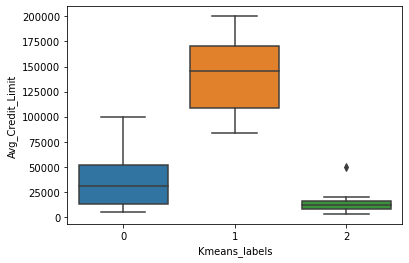

In [358]:
ax = sns.boxplot(x="Kmeans_labels", y="Avg_Credit_Limit", data=df_labeled_KMeans)

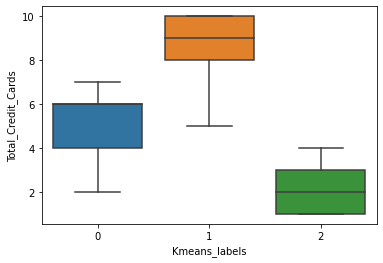

In [359]:
ax = sns.boxplot(x="Kmeans_labels", y="Total_Credit_Cards", data=df_labeled_KMeans)

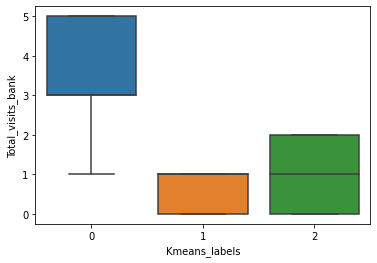

In [360]:
ax = sns.boxplot(x="Kmeans_labels", y="Total_visits_bank", data=df_labeled_KMeans)

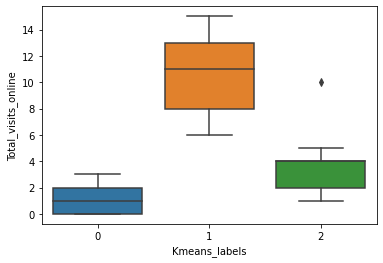

In [361]:
ax = sns.boxplot(x="Kmeans_labels", y="Total_visits_online", data=df_labeled_KMeans)

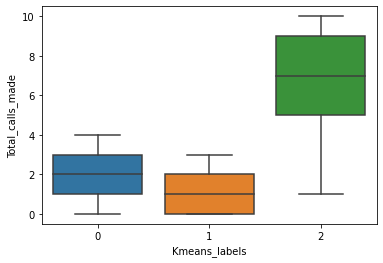

In [362]:
ax = sns.boxplot(x="Kmeans_labels", y="Total_calls_made", data=df_labeled_KMeans)

Text(0.5, 0.92, '3D plot of KMeans Clustering')

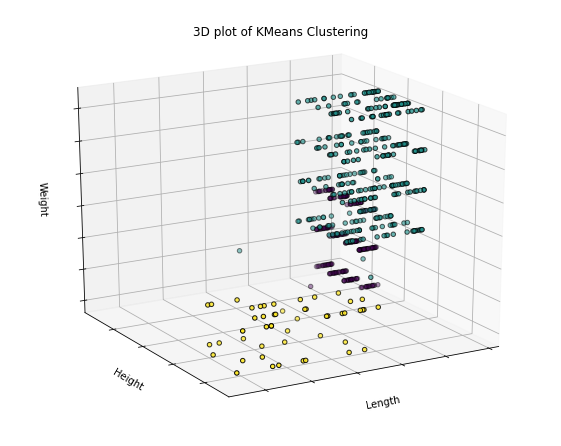

In [510]:
## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(df_z)
labels = k3_model.labels_
ax.scatter(df_z.iloc[:, 0], df_z.iloc[:, 1], df_z.iloc[:, 2], c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

## Hierarchical Clustering

## Choosing a linkage method of measuring distance

0.8977080867389372

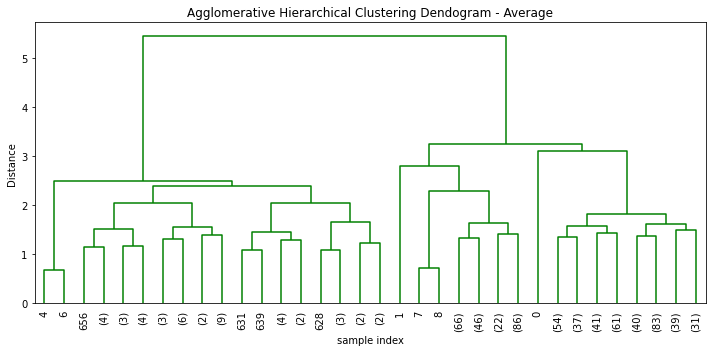

In [363]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Average')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_z, metric='euclidean', method='average')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()
c, coph_dists = cophenet(Z , pdist(df_z))
c

0.8599730607972423

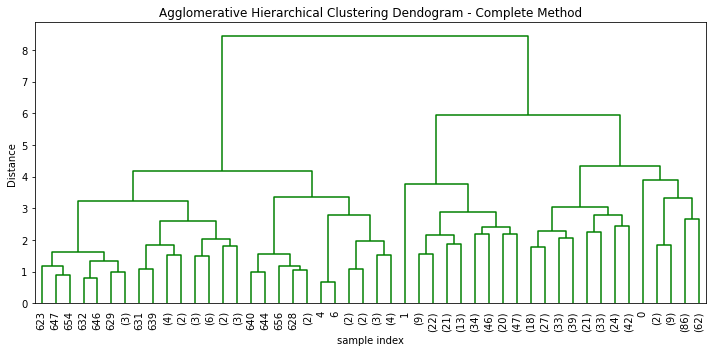

In [364]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Complete Method')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_z, metric='euclidean', method='complete')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()
c, coph_dists = cophenet(Z , pdist(df_z))
c

0.7415156284827493

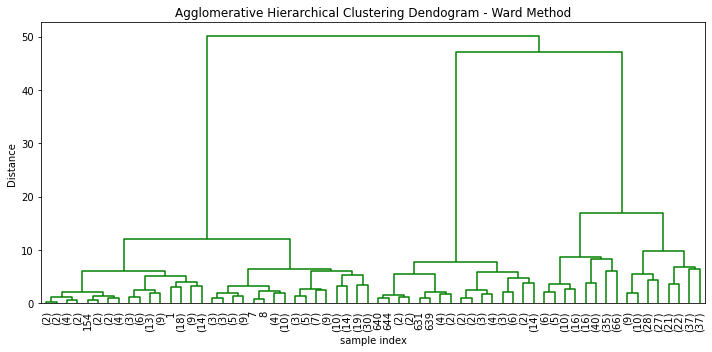

In [365]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Ward Method')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_z, metric='euclidean', method='ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()
c, coph_dists = cophenet(Z , pdist(df_z))
c

## Conclusion - Linkage Method

We will choose average as our method for hierarchial clustering as it has the highest cophenet index which measure of the correlation between the distance of points in feature space and distance on dendrogram. The closer it is to 1, the better is the clustering


## Choosing the optimal distance

In [157]:
Z = linkage(df_z, 'average', metric='euclidean')
Z.shape

(659, 4)

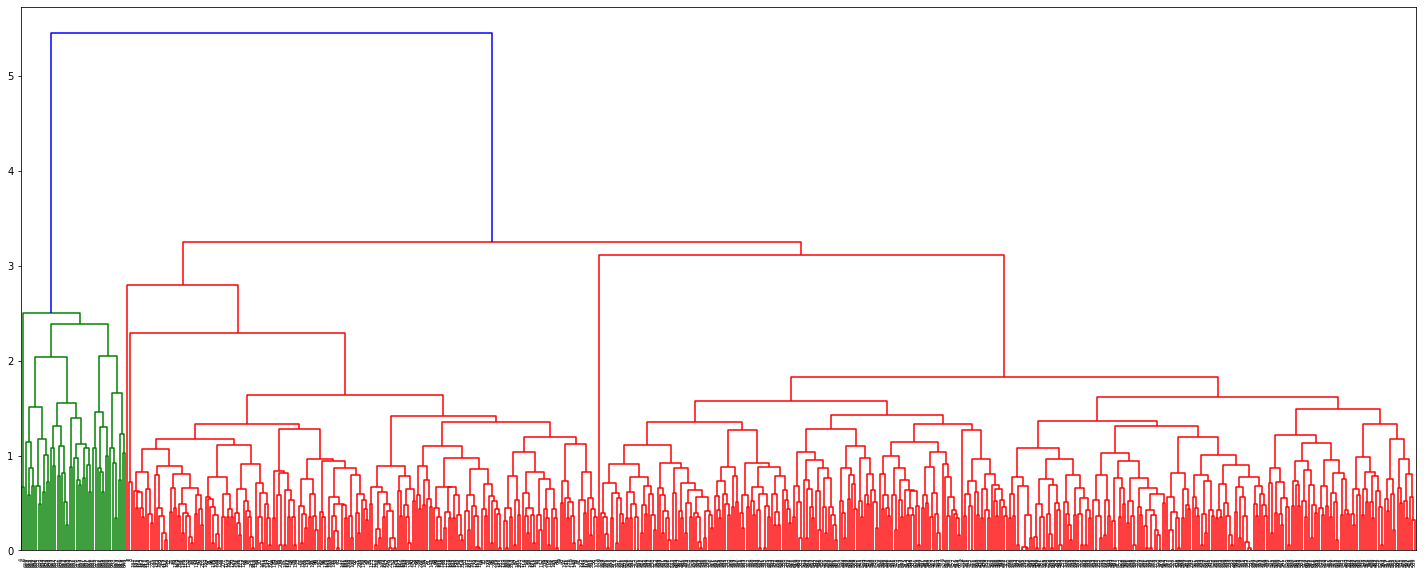

In [158]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

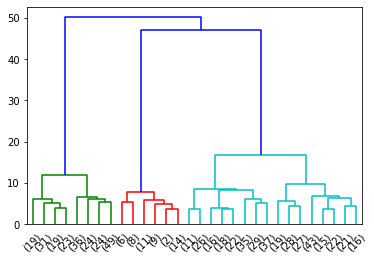

In [370]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
##  p=4,  # show only the last p merged clusters
)
plt.show()

In [160]:
c, coph_dists = cophenet(Z , pdist(df_z))
c

0.8977080867389372

In [481]:
clusters = fcluster(Z, 20, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [482]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [483]:
model.fit(df_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [484]:
df_nokey['HC_labels'] = model.labels_
df_nokey.head(10)

#custDataAttr.groupby(["labels"]).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


In [485]:
pd.value_counts(df_nokey['HC_labels'])

0    387
2    223
1     50
Name: HC_labels, dtype: int64

In [486]:
df_nokey.groupby(['HC_labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
HC_labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


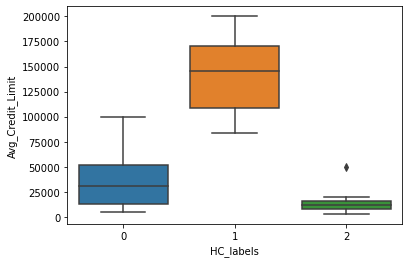

In [487]:
ax = sns.boxplot(x="HC_labels", y="Avg_Credit_Limit", data=df_nokey)

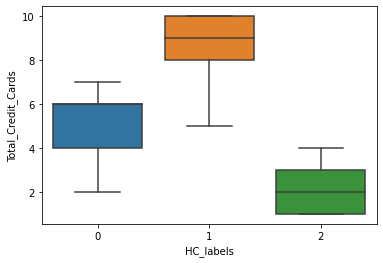

In [488]:
ax = sns.boxplot(x="HC_labels", y="Total_Credit_Cards", data=df_nokey)

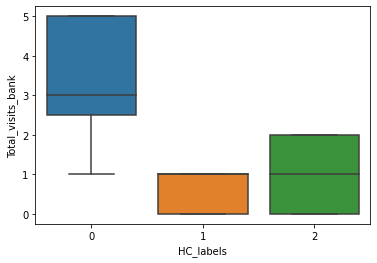

In [489]:
ax = sns.boxplot(x="HC_labels", y="Total_visits_bank", data=df_nokey)

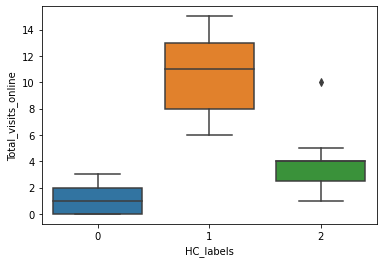

In [490]:
ax = sns.boxplot(x="HC_labels", y="Total_visits_online", data=df_nokey)

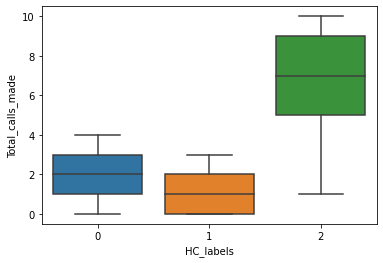

In [491]:
ax = sns.boxplot(x="HC_labels", y="Total_calls_made", data=df_nokey)

## Silhouette score

### K- means

In [492]:
silhouette_score(df_z, df_Kmeans_labels)

C:\Users\zehra.hussain\AppData\Local\Continuum\anaconda4\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5157182558881063

### Hierarchial Clustering

In [493]:
# Calculate Avg Silhoutte Score

silhouette_score(df_z, clusters)

0.5147639589977819

### Conclusion 

The silhouette score of the two methods are very close. Hence not a major deciding factor

## Comparing K-means clusters with Hierarchical clusters 

In [494]:
pd.value_counts(df_labeled_KMeans['Kmeans_labels'])

0    386
2    224
1     50
Name: Kmeans_labels, dtype: int64

In [495]:
df_labeled_KMeans.groupby(['Kmeans_labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Kmeans_labels,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12174.107143,2.410714,0.933036,3.553571,6.870536


In [496]:
pd.value_counts(df_nokey['HC_labels'])

0    387
2    223
1     50
Name: HC_labels, dtype: int64

In [497]:
df_nokey.groupby(['HC_labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
HC_labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


### Conclusion
The summary chart below shows that both the clustering methods have lead to very similar three customer segments.
Some differernce between the two methods are :
1. Altough Hierarchical clustering can’t handle big data well, the size of the dataset is not an issue that we will need to consider. 
2. In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.
3. K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram 

## Cluster Analysis and Final Conclusion

### 1.How many different segments of customers are there?

Both the methods lead us to three unique clusters. I have named them as follows:

1.  Low Credit High Call Customers
2. High Credit Techy Customers
3. Average Credit Bank Visitors


### 2.How are these segments different from each other?

In [498]:
LowCredit_HighCalls =  df_labeled_KMeans[df_labeled_KMeans['Kmeans_labels']==2]

In [499]:
LowCredit_HighCalls.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,224.0,12174.107143,5249.048524,3000.0,8000.0,12000.0,16000.0,50000.0
Total_Credit_Cards,224.0,2.410714,1.100783,1.0,1.0,2.0,3.0,4.0
Total_visits_bank,224.0,0.933036,0.803567,0.0,0.0,1.0,2.0,2.0
Total_visits_online,224.0,3.553571,1.218978,1.0,2.0,4.0,4.0,10.0
Total_calls_made,224.0,6.870536,1.990161,1.0,5.0,7.0,9.0,10.0


In [500]:
HighCredit_Techy =  df_labeled_KMeans[df_labeled_KMeans['Kmeans_labels']==1]

In [501]:
HighCredit_Techy.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.0,141040.00,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0
Total_Credit_Cards,50.0,8.74,1.274715,5.0,8.0,9.0,10.0,10.0
Total_visits_bank,50.0,0.60,0.494872,0.0,0.0,1.0,1.0,1.0
Total_visits_online,50.0,10.90,2.880264,6.0,8.0,11.0,13.0,15.0
Total_calls_made,50.0,1.08,0.876915,0.0,0.0,1.0,2.0,3.0


In [502]:
AvgCredit_BankVisitors =  df_labeled_KMeans[df_labeled_KMeans['Kmeans_labels']==0]

In [503]:
AvgCredit_BankVisitors.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,386.0,33782.383420,22169.460696,5000.0,13000.0,31000.0,52000.0,100000.0
Total_Credit_Cards,386.0,5.515544,1.140069,2.0,4.0,6.0,6.0,7.0
Total_visits_bank,386.0,3.489637,1.135563,1.0,3.0,3.0,5.0,5.0
Total_visits_online,386.0,0.981865,0.857167,0.0,0.0,1.0,2.0,3.0
Total_calls_made,386.0,2.000000,1.430648,0.0,1.0,2.0,3.0,4.0


### 3.What  are  your recommendations  to  the  bank  on  how  to  better  market  to  and service these customers?

#### Low Credit High Call Customers : 
This cluster has low credit and they like to communicate using phone calls. To serve this channel the bank needs to improve its phone service and customer experience in this channel. These customers make more phone call so they can also be cross sold other products using telemarketing.


#### Highy Credit Techy Customers
This is the most elite 8% of the customers with the highest credit limit and highest number of cards. These customers like to ccommunicate online. To serve this segment better the bank needs to make sure that it has a good online experience and delivery system. Online web banners can be deployed on the website to cross sell to this segment. Email marketing messages can also be an effective channel of communication for this customer segment.

#### Average Credit Bank Visitors
This cluster has an average credit of 33K and has anywhere between 2 and 7 cards. These customers like to go into the branch and have an average bank visit of 4 which is highest amongst all the three clusters. To serve this cluster the bank will need to make sure that the customer service at the branch is good and prompt. And the front line staff is trained to provide excellent cutomer service at the branch. To cross sell to these customers the front line service representatitves will have to be trained in upselling these customers. In branch promotion material, banners and flyers would also be an effective channel to market to these customers


In [511]:
import os

os.system('jupyter nbconvert --to html Project UnSupervised_Zehra Hussain_ZehraHussain.ipynb')

-1